In [ ]:
#Data Science project
#Problem statement:Develop an income classifier system for individuals.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/income(1).csv',na_values=[" ?"])

In [ ]:
data.shape  

(31978, 13)

In [ ]:
data.head(10)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,"less than or equal to 50,000"
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,"less than or equal to 50,000"


In [ ]:
data.tail()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31977,29,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,"less than or equal to 50,000"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [ ]:
data.dtypes

age               int64
JobType          object
EdType           object
maritalstatus    object
occupation       object
relationship     object
race             object
gender           object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
SalStat          object
dtype: object

In [ ]:
#Observation:As all columns in the income dataset has proper datatypes so there is no need to do data manipulation.

In [ ]:
data.describe() #For statistics analysis

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [ ]:
#Data cleaning:

In [ ]:
data.isnull().sum() #Finding missing value if any

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [ ]:
# filling with most common class
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
data.head(10)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,"less than or equal to 50,000"
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
8,17,Private,11th,Never-married,Prof-specialty,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,"less than or equal to 50,000"


In [ ]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [ ]:
##Data Analysis

In [ ]:
data['age'].unique()

array([45, 24, 44, 27, 20, 51, 17, 19, 60, 40, 30, 38, 23, 32, 54, 50, 37,
       52, 49, 22, 35, 67, 46, 33, 43, 28, 41, 25, 63, 59, 34, 26, 72, 62,
       58, 47, 39, 53, 57, 21, 42, 74, 36, 29, 31, 69, 18, 65, 55, 48, 71,
       70, 66, 56, 61, 68, 64, 73, 81, 78, 76, 90, 88, 75, 77, 80, 82, 79,
       83, 84, 85, 86, 87])

In [ ]:
data['age'].describe()

count    31978.000000
mean        38.579023
std         13.662085
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [ ]:
# Observation : 50% people age is 37

In [ ]:
data['age'][data['age']>37].count()

15594

In [ ]:
data['age'][data['age']<37].count()

15548

In [ ]:
data.groupby('JobType')['SalStat'].count()

JobType
 Federal-gov           943
 Local-gov            2067
 Never-worked            7
 Private             24095
 Self-emp-inc         1074
 Self-emp-not-inc     2499
 State-gov            1279
 Without-pay            14
Name: SalStat, dtype: int64

In [ ]:
data.groupby('EdType')['SalStat'].count()

EdType
 10th              921
 11th             1167
 12th              417
 1st-4th           163
 5th-6th           318
 7th-8th           627
 9th               506
 Assoc-acdm       1055
 Assoc-voc        1366
 Bachelors        5210
 Doctorate         390
 HS-grad         10368
 Masters          1674
 Preschool          50
 Prof-school       559
 Some-college     7187
Name: SalStat, dtype: int64

In [ ]:
data.groupby('maritalstatus')['SalStat'].count()

maritalstatus
 Divorced                  4394
 Married-AF-spouse           23
 Married-civ-spouse       14692
 Married-spouse-absent      397
 Never-married            10488
 Separated                 1005
 Widowed                    979
Name: SalStat, dtype: int64

In [ ]:
data.groupby('occupation')['SalStat'].count()

occupation
 Adm-clerical         3721
 Armed-Forces            9
 Craft-repair         4030
 Exec-managerial      3992
 Farming-fishing       989
 Handlers-cleaners    1350
 Machine-op-inspct    1966
 Other-service        3212
 Priv-house-serv       143
 Prof-specialty       5854
 Protective-serv       644
 Sales                3584
 Tech-support          912
 Transport-moving     1572
Name: SalStat, dtype: int64

In [ ]:
data.groupby('relationship')['SalStat'].count()

relationship
 Husband           12947
 Not-in-family      8156
 Other-relative      952
 Own-child          5005
 Unmarried          3384
 Wife               1534
Name: SalStat, dtype: int64

In [ ]:
data.groupby('race')['SalStat'].count()

race
 Amer-Indian-Eskimo      311
 Asian-Pac-Islander      956
 Black                  3028
 Other                   253
 White                 27430
Name: SalStat, dtype: int64

In [ ]:
data.groupby('relationship')['SalStat'].count()

relationship
 Husband           12947
 Not-in-family      8156
 Other-relative      952
 Own-child          5005
 Unmarried          3384
 Wife               1534
Name: SalStat, dtype: int64

In [ ]:
data.groupby('gender')['SalStat'].count()

gender
 Female    10608
 Male      21370
Name: SalStat, dtype: int64

In [ ]:
data['capitalgain'].describe()

count    31978.000000
mean      1064.360623
std       7298.596271
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capitalgain, dtype: float64

In [ ]:
data['capitalloss'].describe()

count    31978.000000
mean        86.739352
std        401.594301
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capitalloss, dtype: float64

In [ ]:
data['hoursperweek'].describe()

count    31978.000000
mean        40.417850
std         12.345285
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hoursperweek, dtype: float64

In [ ]:
data['hoursperweek'][data['hoursperweek']>40].count()

9399

In [ ]:
data['hoursperweek'][data['hoursperweek']<40].count()

7647

In [ ]:
data.groupby('nativecountry')['SalStat'].count() 

nativecountry
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                          28
 El-Salvador                     106
 England                          90
 France                           29
 Germany                         137
 Greece                           29
 Guatemala                        64
 Haiti                            44
 Holand-Netherlands                1
 Honduras                         13
 Hong                             20
 Hungary                          13
 India                           100
 Iran                             43
 Ireland                          24
 Italy                            73
 Jamaica                          81
 Japan                            62
 Laos                             18
 Mexico                          643
 Nicaragua              

In [ ]:
data.groupby('SalStat').count() 

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
SalStat,,,,,,,,,,,,
"greater than 50,000",7695,7695,7695,7695,7695,7695,7695,7695,7695,7695,7695,7695
"less than or equal to 50,000",24283,24283,24283,24283,24283,24283,24283,24283,24283,24283,24283,24283


In [ ]:
#Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


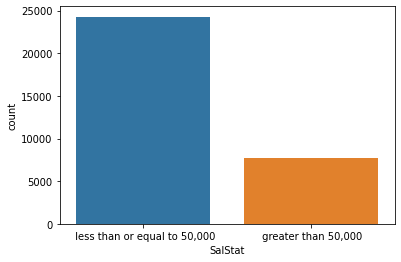

In [ ]:
sns.countplot(data['SalStat'])
plt.show()

In [ ]:
#Observation:Salstat -- >less than or equal to 50,000 is nearly 25000 & greater than 50,000 is between 5000 and 10,000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


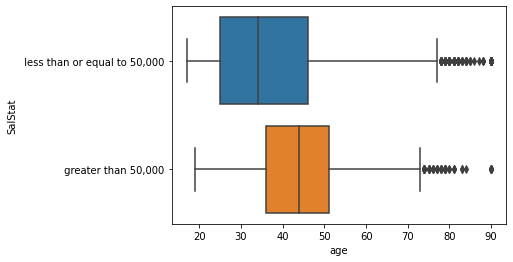

In [ ]:
sns.boxplot(data['age'],data['SalStat'])
plt.show()

In [ ]:
#Observation:Age ---> For SalStat greater than 50,000 mean value of age is between 40 & 50.For SalStat less than or equal to 50,000 mean value of age is between 30 & 40.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


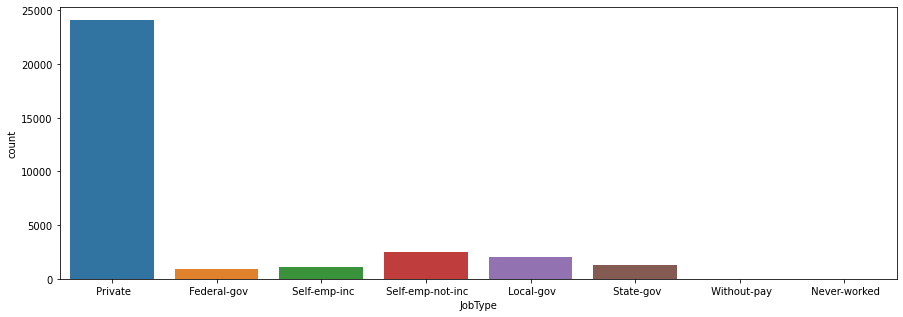

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data['JobType'])
plt.show()

In [ ]:
#Observation: count of private job is nearly 25000

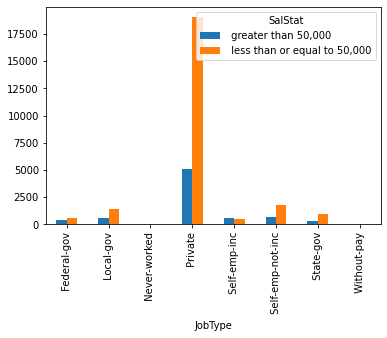

In [ ]:
crosstb = pd.crosstab(data.JobType, data.SalStat)
barplot = crosstb.plot.bar()


In [ ]:
#Observation: In private job salary is greater than 50,000 is nearly 5000 and salary is less than or equal to 50,000 is more than 17500

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


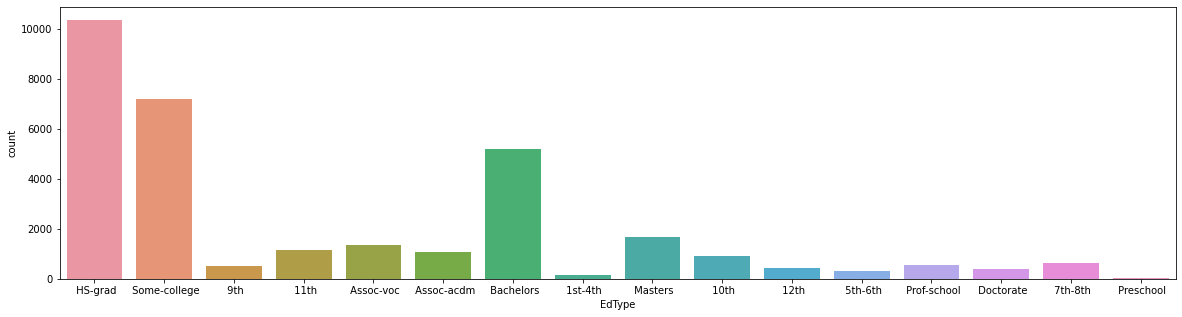

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(data['EdType'])
plt.show()

In [ ]:
#Observation -->HS-grad is the highest and more than 10000

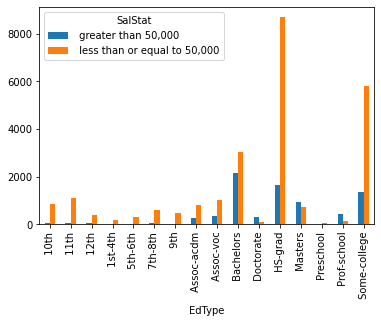

In [ ]:
crosstb = pd.crosstab(data.EdType, data.SalStat)
barplot = crosstb.plot.bar()

In [ ]:
#Observation:HS-Grad and salary is greater than 50,000 is more than 8000 and HS-Grad and salary isless than or equal to 50,000 is below 2000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


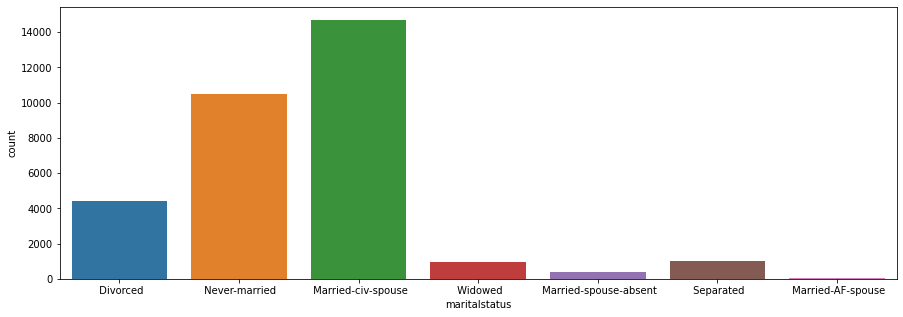

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data['maritalstatus'])
plt.show()

In [ ]:
#Observation:Married-civ-spouse is more than 14000

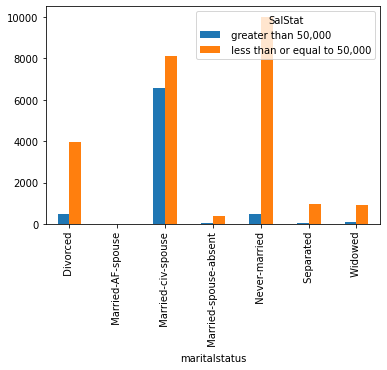

In [ ]:
crosstb = pd.crosstab(data.maritalstatus, data.SalStat)
barplot = crosstb.plot.bar()

In [ ]:
#Observation:Never-married and salary is less than or equal to 50,000 is 10,000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


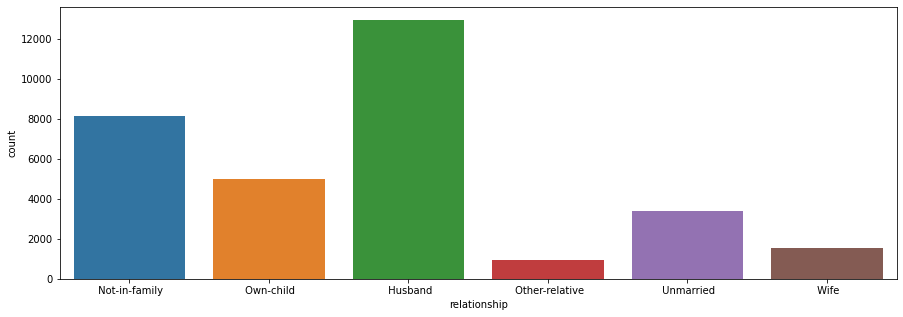

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data['relationship'])
plt.show()

In [ ]:
#observation:In relationship count of husband is the highest and more than 12000

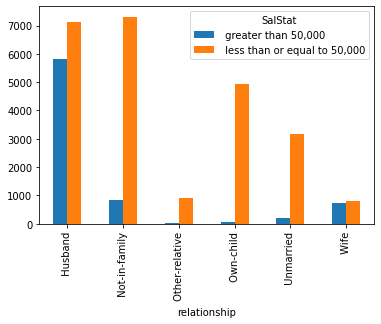

In [ ]:
crosstb = pd.crosstab(data.relationship, data.SalStat)
barplot = crosstb.plot.bar()

In [ ]:
#observation:In relationship type husband and SalStat is greater than 50000 between 5000 and 6000 ,relationship type not-in-family and SalStat is less than or equal to 50000is more than 7000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


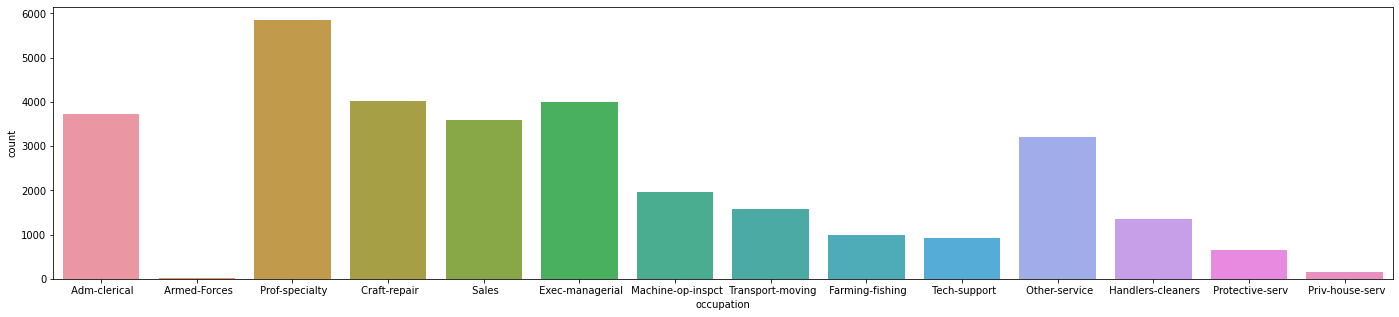

In [ ]:
plt.figure(figsize=(24, 5))
sns.countplot(data['occupation'])
plt.show()

In [ ]:
#Observation:count of Prof-speciality is the highest and between 5000 and 6000

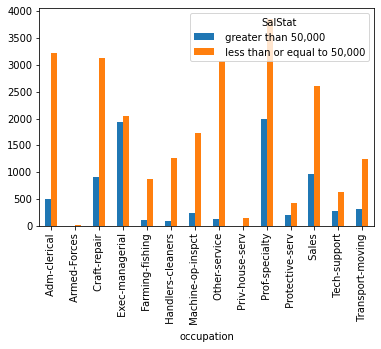

In [ ]:
crosstb = pd.crosstab(data.occupation, data.SalStat)
barplot = crosstb.plot.bar()

In [ ]:
#Observation:occupation type Prof-Speciality and Salstat is less than or equal to 50,000 is between 3500 and 4000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


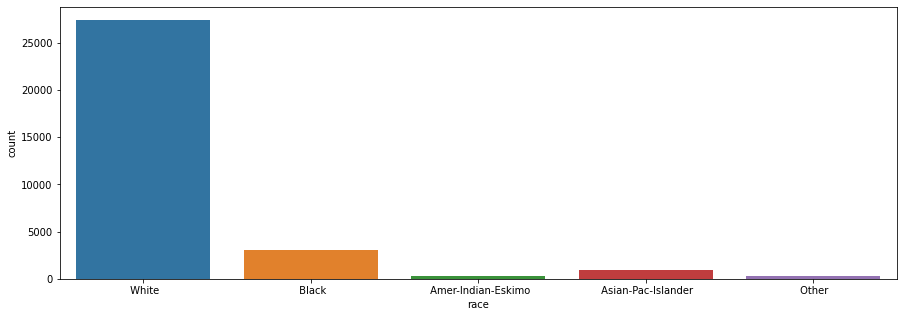

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data['race'])
plt.show()

In [ ]:
#Observation:count of white is more than 25000

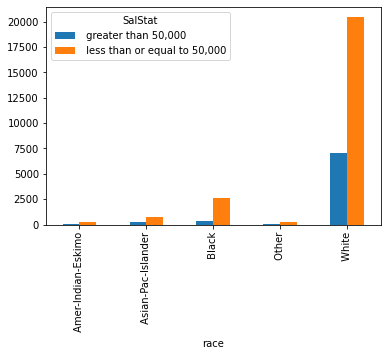

In [ ]:
crosstb = pd.crosstab(data.race, data.SalStat)
barplot = crosstb.plot.bar()

In [ ]:
#Observation:white and Salstat is greater than 50,000 is between 5000 and 7500

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


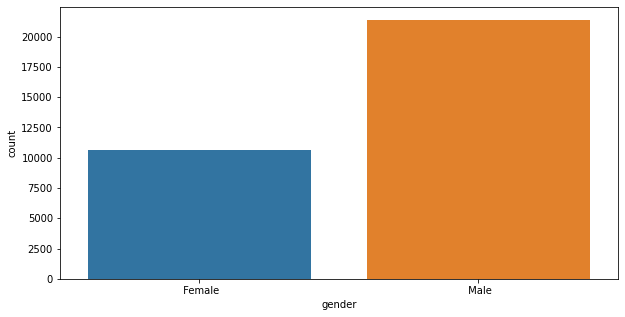

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data['gender'])
plt.show()

In [ ]:
#Observation: count of male is more than and nearly 20,000 and count of female is more than and nearly 10,000.

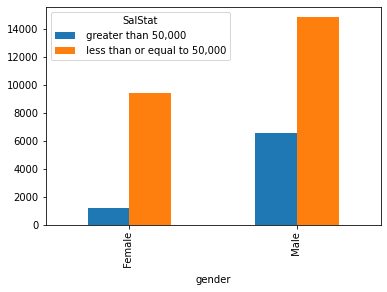

In [ ]:
crosstb = pd.crosstab(data.gender, data.SalStat)
barplot = crosstb.plot.bar()

In [ ]:
#Observation:Male Salstat is higher than female Salstat

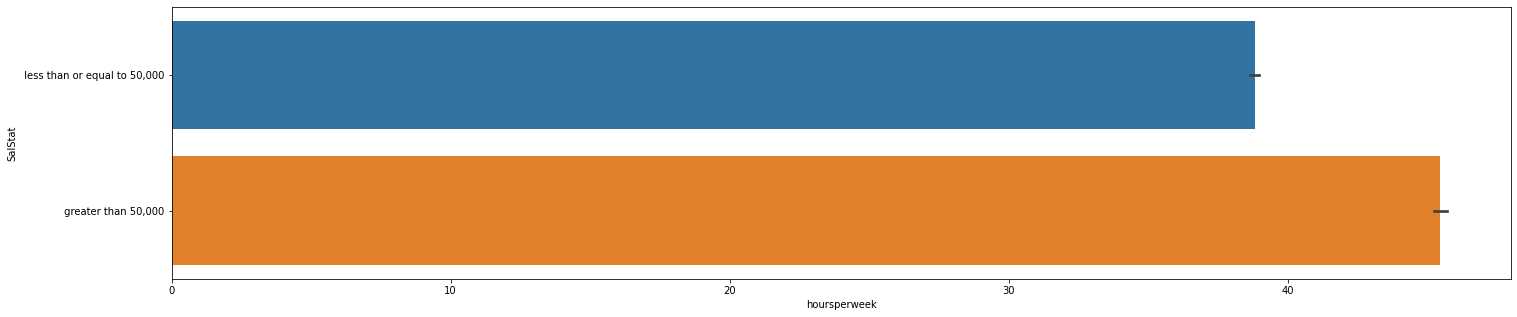

In [ ]:
plt.figure(figsize=(24, 5))
sns.barplot(data=data,x='hoursperweek',y='SalStat')
plt.show()

In [ ]:
#Observation : People whose salary is less than or equal to 50,000 is working less hoursperweek than people with greater than 50,000

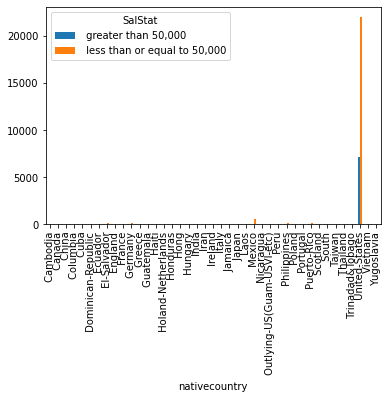

In [ ]:
crosstb = pd.crosstab(data.nativecountry, data.SalStat)
barplot = crosstb.plot.bar()

In [ ]:
#Observation:Salstat of United-states is higher than other countries.

In [ ]:
data.to_csv('income_after_cleaning.csv')

In [ ]:
##Machine learning model

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()
X = data.iloc[:,1].values
data.iloc[:,1] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

In [ ]:
labelencoder = LabelEncoder()
X = data.iloc[:,2].values
data.iloc[:,2] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

In [ ]:
labelencoder = LabelEncoder()
X = data.iloc[:,3].values
data.iloc[:,3] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

In [ ]:
labelencoder = LabelEncoder()
X = data.iloc[:,4].values
data.iloc[:,4] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

In [ ]:
labelencoder = LabelEncoder()
X = data.iloc[:,5].values
data.iloc[:,5] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

In [ ]:
labelencoder = LabelEncoder()
X = data.iloc[:,6].values
data.iloc[:,6] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

In [ ]:
labelencoder = LabelEncoder()
X = data.iloc[:,7].values
data.iloc[:,7] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

In [ ]:
labelencoder = LabelEncoder()
X = data.iloc[:,11].values
data.iloc[:,11] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

In [ ]:
labelencoder = LabelEncoder()
X = data.iloc[:,12].values
data.iloc[:,12] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

In [ ]:
data

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,3,11,0,0,1,4,0,0,0,28,38,1
1,24,0,11,4,1,3,4,1,0,0,40,38,1
2,44,3,15,2,9,0,4,1,0,0,40,38,0
3,27,3,6,4,2,2,4,1,0,0,40,25,1
4,20,3,15,4,11,1,4,1,0,0,35,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,1,11,4,4,1,2,1,594,0,60,38,1
31974,34,1,15,4,10,1,4,0,0,0,40,38,1
31975,23,3,15,2,0,0,4,1,0,0,40,38,1
31976,42,1,15,2,0,5,4,0,0,0,40,38,1


In [ ]:
data=data[['age','JobType','EdType','maritalstatus','occupation','relationship','race','gender','capitalgain','capitalloss','hoursperweek','nativecountry','SalStat']]

In [ ]:
x=data[['age','JobType','EdType','maritalstatus','occupation','relationship','race','gender','capitalgain','capitalloss','hoursperweek','nativecountry']]
y=data['SalStat']

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [ ]:
#Minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()
x_train_min= mms.fit_transform(x_train)
x_test_min = mms.transform(x_test)

In [ ]:
#Standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
x_train_norm = independent_scaler.fit_transform(x_train)
x_test_norm = independent_scaler.transform(x_test)


In [ ]:
y

0        1
1        1
2        0
3        1
4        1
        ..
31973    1
31974    1
31975    1
31976    1
31977    1
Name: SalStat, Length: 31978, dtype: int64

In [ ]:
pd.Series(y_test).value_counts()

1    6115
0    1880
Name: SalStat, dtype: int64

In [ ]:
#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61      1880
           1       0.88      0.87      0.88      6115

    accuracy                           0.81      7995
   macro avg       0.74      0.75      0.75      7995
weighted avg       0.82      0.81      0.81      7995



In [ ]:
#Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61      1880
           1       0.88      0.87      0.88      6115

    accuracy                           0.81      7995
   macro avg       0.74      0.75      0.75      7995
weighted avg       0.82      0.81      0.81      7995



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
from sklearn.metrics import accuracy_score,confusion_matrix


(22384, 12) (9594, 12) (22384,) (9594,)


In [ ]:
target_names = ['less than or equal to 50,000','greater than 50,000']

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train , y_train)
prediction =knn.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.8253074838440692


In [ ]:
confusionMmatrix_knn = confusion_matrix(y_test, prediction)
print(confusionMmatrix_knn)

[[1583  732]
 [ 944 6335]]


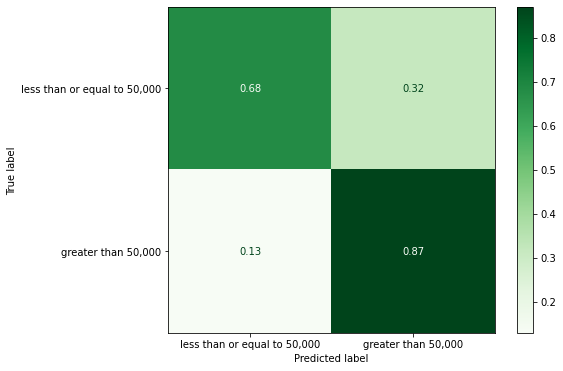

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , classification_report
cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')

0.7995622263914947
                              precision    recall  f1-score   support

less than or equal to 50,000       0.69      0.30      0.42      2315
         greater than 50,000       0.81      0.96      0.88      7279

                    accuracy                           0.80      9594
                   macro avg       0.75      0.63      0.65      9594
                weighted avg       0.78      0.80      0.77      9594



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


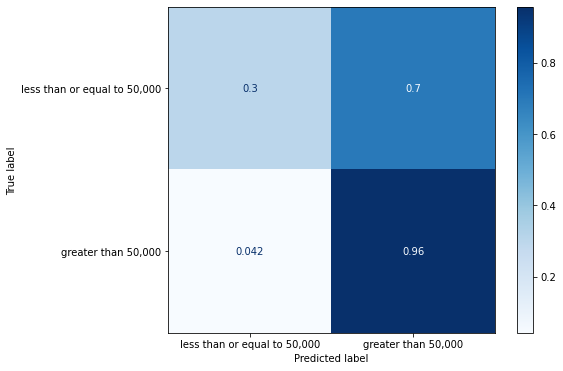

In [ ]:
#logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
lgr = LogisticRegression()
lgr.fit(X_train , y_train)

prediction = lgr.predict(X_test)
from sklearn import metrics
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,prediction)
print(accuracy)

print(classification_report(y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

0.7997706900145924
                              precision    recall  f1-score   support

less than or equal to 50,000       0.72      0.28      0.40      2315
         greater than 50,000       0.81      0.97      0.88      7279

                    accuracy                           0.80      9594
                   macro avg       0.76      0.62      0.64      9594
                weighted avg       0.79      0.80      0.76      9594



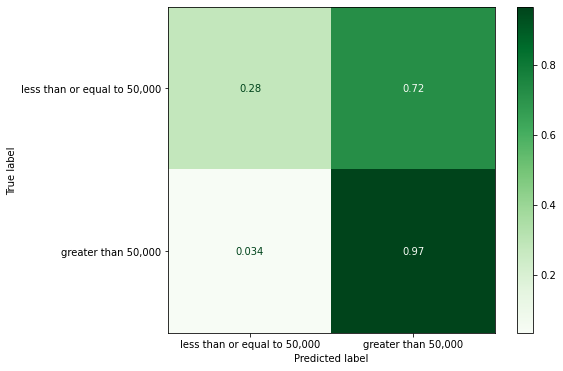

In [ ]:
#Svm
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train.values.ravel())

prediction = svc.predict(X_test)
prediction

accuracy = metrics.accuracy_score(y_test , prediction)
print(accuracy)

print(classification_report(y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')

0.794767563060246
                              precision    recall  f1-score   support

less than or equal to 50,000       0.66      0.31      0.42      2315
         greater than 50,000       0.81      0.95      0.88      7279

                    accuracy                           0.79      9594
                   macro avg       0.73      0.63      0.65      9594
                weighted avg       0.78      0.79      0.77      9594



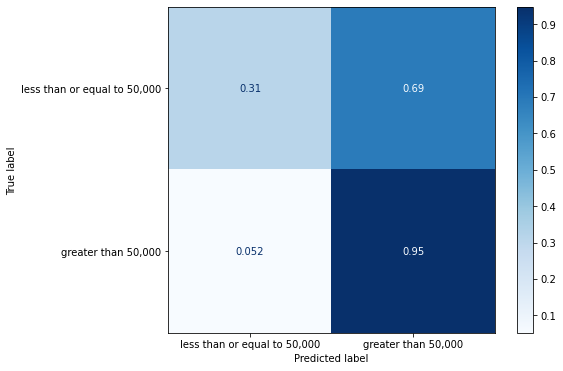

In [ ]:
#navbayes 
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
prediction

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

print(classification_report(y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')